In [107]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [31]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [34]:
df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [35]:
df.shape

(31962, 3)

### Data Preprocessing

In [36]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

### Remove Punctation

In [87]:
string.punctuation+'ðâï'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ðâï'

In [51]:
def remove_user_handle(input_tweet):
    # remove user handles - starting from @user
    clean_tweet = re.sub("@[\w]*", "", input_tweet)
    return clean_tweet

In [52]:
df['remove_user_handle_from_tweet'] = df['tweet'].apply( lambda x: remove_user_handle(x) )

In [88]:
def remove_punctuation(text):
    text_punct = "".join([char for char in text if char not in string.punctuation+'ððâï' ])
    return text_punct

In [89]:
df['tweet_removed_punctuation'] = df['remove_user_handle_from_tweet'].apply( lambda x: remove_punctuation(x))

In [80]:
def tweet_to_lower(text):
  return text.lower()

In [90]:
df['tweet_clean'] = df['tweet_removed_punctuation'].apply( lambda x: tweet_to_lower(x))

### Tokenize

In [82]:
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

In [91]:
df['tweet_tokenize'] = df['tweet_clean'].apply( lambda x: tokenize(x.strip()))

### Remove Stop Words

In [92]:
import nltk
stopword = nltk.corpus.stopwords.words('english')

In [93]:
def remove_stopwords(tokenized_list):
  text = [ word for word in tokenized_list if word not in stopword ]
  return text

In [96]:
df['tweet_removed_stopword'] = df['tweet_tokenize'].apply( lambda x: remove_stopwords(x))

In [97]:
df.head()

,id,label,tweet,clean_tweet,remove_user_handle_from_tweet,tweet_removed_punctuation,tweet_clean,tweet_tokenize,tweet_removed_stopword
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,thanks for lyft credit i cant use cause they...,"[thanks, for, lyft, credit, i, cant, use, caus...","[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur, ]"
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


### STEM

In [98]:
ps = nltk.PorterStemmer()

def stemming(tokenize_text):
  return [ ps.stem(word) for word in tokenize_text ]

In [99]:
df['tweet_stemmed'] = df['tweet_removed_stopword'].apply( lambda x: stemming(x) )

In [100]:
df.head()

,id,label,tweet,clean_tweet,remove_user_handle_from_tweet,tweet_removed_punctuation,tweet_clean,tweet_tokenize,tweet_removed_stopword,tweet_stemmed
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,thanks for lyft credit i cant use cause they...,"[thanks, for, lyft, credit, i, cant, use, caus...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o..."
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur, ]","[model, love, u, take, u, time, ur, ]"
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]"


### LEMMATIZE

In [105]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenize_text):
  return [ wn.lemmatize(word) for word in tokenize_text ]

In [108]:
df['tweet_lemmatize'] = df['tweet_removed_stopword'].apply( lambda x: lemmatizing(x))

In [109]:
df.head()

,id,label,tweet,clean_tweet,remove_user_handle_from_tweet,tweet_removed_punctuation,tweet_clean,tweet_tokenize,tweet_removed_stopword,tweet_stemmed,tweet_lemmatize
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,thanks for lyft credit i cant use cause they...,"[thanks, for, lyft, credit, i, cant, use, caus...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur, ]","[model, love, u, take, u, time, ur, ]","[model, love, u, take, u, time, ur, ]"
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [110]:
def clean_text(text):
  return " ".join([ word for word in text ])

In [111]:
df['stemmed_clean_text'] = df['tweet_stemmed'].apply( lambda x: clean_text(x))
df['lemmatized_clean_text'] = df['tweet_lemmatize'].apply( lambda x: clean_text(x))

In [112]:
df

,id,label,tweet,clean_tweet,remove_user_handle_from_tweet,tweet_removed_punctuation,tweet_clean,tweet_tokenize,tweet_removed_stopword,tweet_stemmed,tweet_lemmatize,stemmed_clean_text,lemmatized_clean_text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,thanks for lyft credit i cant use cause they...,"[thanks, for, lyft, credit, i, cant, use, caus...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...","[thanks, lyft, credit, cant, use, cause, dont,...",thank lyft credit cant use caus dont offer whe...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur, ]","[model, love, u, take, u, time, ur, ]","[model, love, u, take, u, time, ur, ]",model love u take u time ur,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...,ate isz that youuu?ððððððð...,ate isz that youuu...,ate isz that youuu...,"[ate, isz, that, youuu, ]","[ate, isz, youuu, ]","[ate, isz, youuu, ]","[ate, isz, youuu, ]",ate isz youuu,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, trying, wrap, ma...","[see, nina, turner, airwav, tri, wrap, mantl, ...","[see, nina, turner, airwave, trying, wrap, man...",see nina turner airwav tri wrap mantl genuin h...,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor...","[listening, sad, songs, monday, morning, otw, ...","[listen, sad, song, monday, morn, otw, work, sad]","[listening, sad, song, monday, morning, otw, w...",listen sad song monday morn otw work sad,listening sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple 

### Word Cloud

In [123]:
positive_tweet = df[ df['label'] == 0 ]
negative_tweet = df[ df['label'] == 1 ]

In [124]:
positive_tweet = " ".join([ i for i in positive_tweet['stemmed_clean_text'] ])
negative_tweet = " ".join([ i for i in negative_tweet['stemmed_clean_text'] ])

### Generate WordCloud for positive tweet

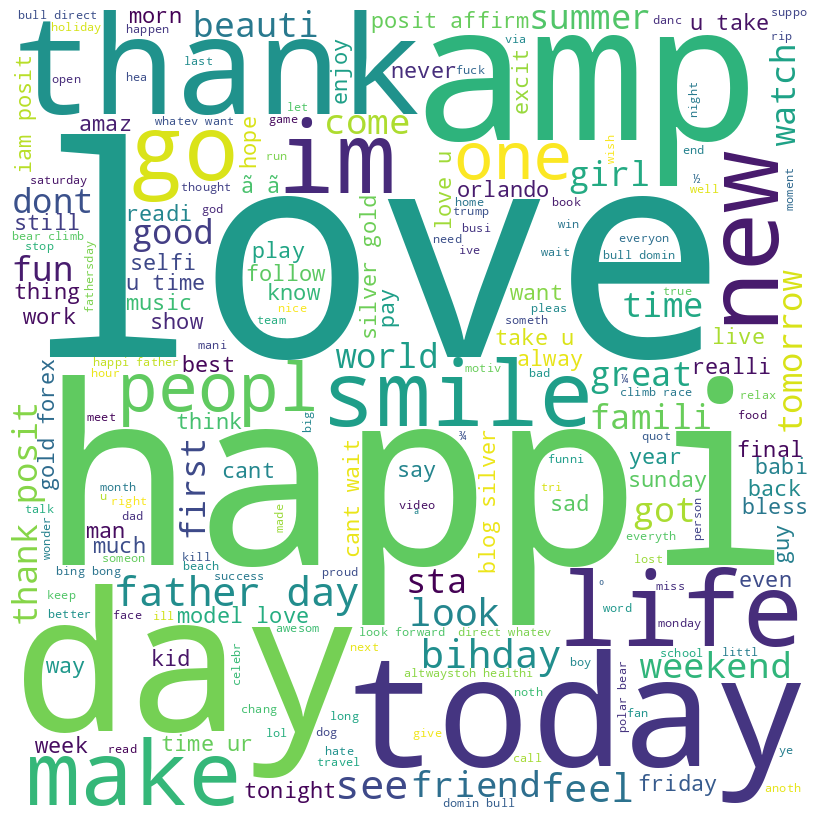

In [121]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size =10).generate(positive_tweet)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Generate WordCloud for Negative tweets

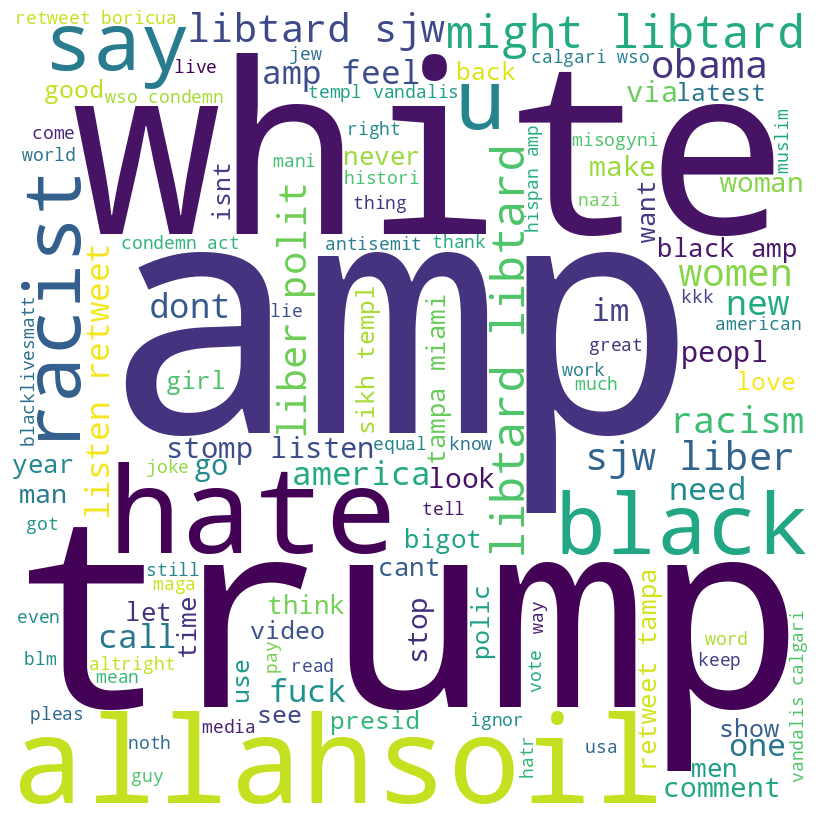

In [125]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size =10).generate(negative_tweet)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Build the Model based on the Bags of Words

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [135]:
# Create features based on bag of words
bag_of_word_vectorizer = CountVectorizer()
df_bow = bag_of_word_vectorizer.fit_transform(df['stemmed_clean_text'])


# Test - Train Split
x_train, x_test, y_train, y_test = train_test_split(df_bow, df['label'], test_size=0.2, random_state=42)


# Train Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression: f1_score: {lr_f1}, precision_score: {lr_prec}")
print(lr_conf_matrix)


# Train Decision Tree
dt = DecisionTreeClassifier( max_depth = 6, random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Classifier: f1_score: {dt_f1}, precision_score: {dt_prec}")
print(dt_conf_matrix)



# Train Xgboost
xg = XGBClassifier(n_estimators=1000, learning_rate = 0.001, max_depth = 6, random_state = 42)
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)
xg_f1 = f1_score(y_test, y_pred_xg)
xg_prec = precision_score(y_test, y_pred_xg)
xg_conf_matrix = confusion_matrix(y_test, y_pred_xg)
print(f"XGBoost Classifier: f1_score: {xg_f1}, precision_score: {xg_prec}")
print(xg_conf_matrix)





Logistic Regression: f1_score: 0.6577896138482023, precision_score: 0.8372881355932204
[[5889   48]
 [ 209  247]]
Decision Tree Classifier: f1_score: 0.34812286689419797, precision_score: 0.7846153846153846
[[5909   28]
 [ 354  102]]
XGBoost Classifier: f1_score: 0.19960861056751467, precision_score: 0.9272727272727272
[[5933    4]
 [ 405   51]]


### Model based on TF-IDF approach

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(df['stemmed_clean_text'])

# Test - Train Split
x_train, x_test, y_train, y_test = train_test_split(df_tfidf, df['label'], test_size=0.2, random_state=42)


# Train Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression: f1_score: {lr_f1}, precision_score: {lr_prec}")
print(lr_conf_matrix)


# Train Decision Tree
dt = DecisionTreeClassifier( max_depth = 6, random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Classifier: f1_score: {dt_f1}, precision_score: {dt_prec}")
print(dt_conf_matrix)



# Train Xgboost
xg = XGBClassifier(n_estimators=1000, learning_rate = 0.001, max_depth = 6, random_state = 42)
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)
xg_f1 = f1_score(y_test, y_pred_xg)
xg_prec = precision_score(y_test, y_pred_xg)
xg_conf_matrix = confusion_matrix(y_test, y_pred_xg)
print(f"XGBoost Classifier: f1_score: {xg_f1}, precision_score: {xg_prec}")
print(xg_conf_matrix)



Logistic Regression: f1_score: 0.4355108877721943, precision_score: 0.9219858156028369
[[5926   11]
 [ 326  130]]
Decision Tree Classifier: f1_score: 0.3344827586206896, precision_score: 0.782258064516129
[[5910   27]
 [ 359   97]]
XGBoost Classifier: f1_score: 0.19960861056751467, precision_score: 0.9272727272727272
[[5933    4]
 [ 405   51]]
